In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"0ad74f52-923a-44f0-bf22-da9c8c0a47f4\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Final Project - Fall 2024 - Syed Hashim Raza\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

Picking up from the proposal earlier, now I will be fitting 4 models - Logistic Regression, Decision Tree, Random Forests and Gradient Boosting Machine to see what results we get from our data. and whether or not any adjustment to the dataset is required or not. 





In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("final_steam_games_db.csv")

# Define features and target
X = df.drop(columns=["GOTY_Nomination", "Game Name", "Developer", "Publisher", "Release Date"])
y = df["GOTY_Nomination"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Classification Report for Logistic Regression (Original Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       181
           1       0.33      0.17      0.22         6

    accuracy                           0.96       187
   macro avg       0.65      0.58      0.60       187
weighted avg       0.95      0.96      0.96       187



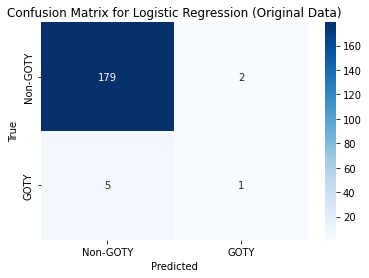

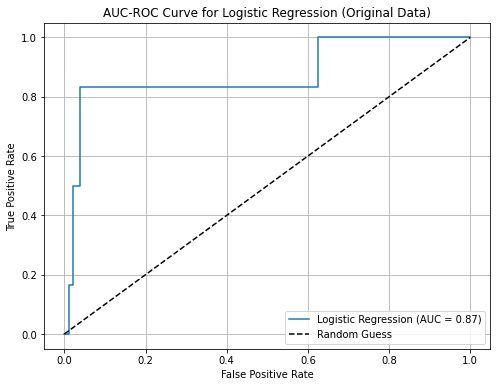

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Results
print("Classification Report for Logistic Regression (Original Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-GOTY", "GOTY"], yticklabels=["Non-GOTY", "GOTY"])
plt.title("Confusion Matrix for Logistic Regression (Original Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Logistic Regression (Original Data)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Classification Report for Decision Tree (Original Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       181
           1       0.00      0.00      0.00         6

    accuracy                           0.96       187
   macro avg       0.48      0.49      0.49       187
weighted avg       0.94      0.96      0.95       187



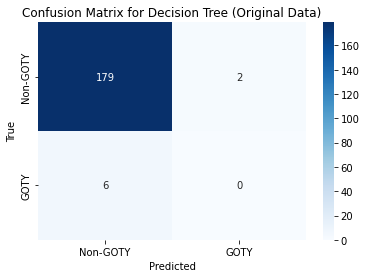

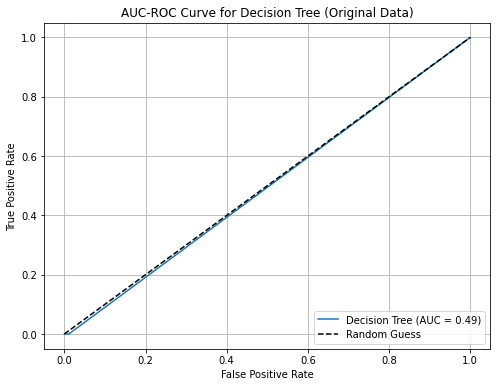

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_test)
y_proba = decision_tree.predict_proba(X_test)[:, 1]

# Results
print("Classification Report for Decision Tree (Original Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-GOTY", "GOTY"], yticklabels=["Non-GOTY", "GOTY"])
plt.title("Confusion Matrix for Decision Tree (Original Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Decision Tree (Original Data)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Classification Report for Random Forest (Original Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       181
           1       0.00      0.00      0.00         6

    accuracy                           0.97       187
   macro avg       0.48      0.50      0.49       187
weighted avg       0.94      0.97      0.95       187

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

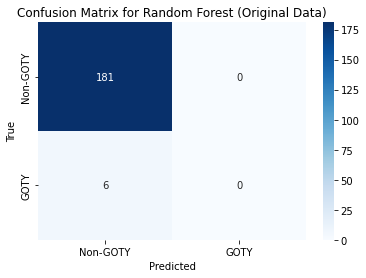

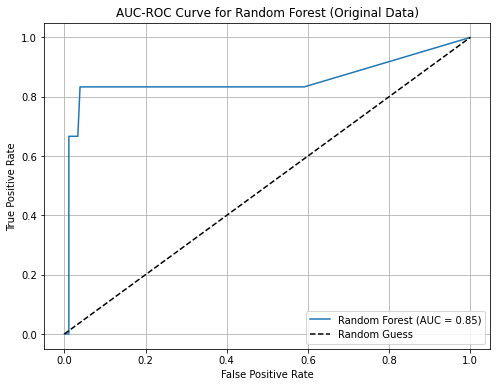

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

# Predictions
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)[:, 1]

# Results
print("Classification Report for Random Forest (Original Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-GOTY", "GOTY"], yticklabels=["Non-GOTY", "GOTY"])
plt.title("Confusion Matrix for Random Forest (Original Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Random Forest (Original Data)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Classification Report for Gradient Boosting (Original Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       181
           1       0.00      0.00      0.00         6

    accuracy                           0.96       187
   macro avg       0.48      0.49      0.49       187
weighted avg       0.94      0.96      0.95       187



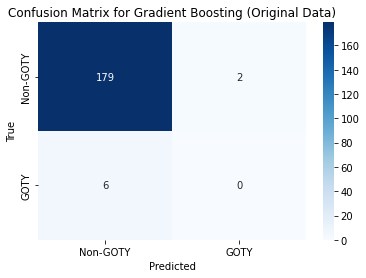

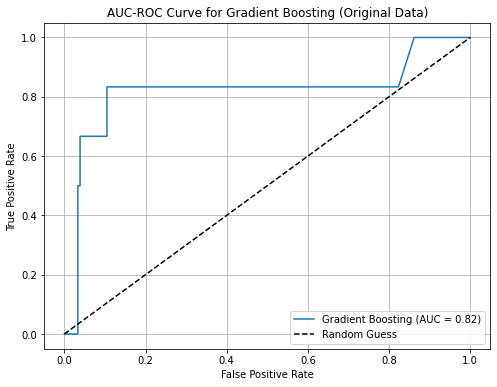

In [ ]:
# Gradient Boosting
gbm = GradientBoostingClassifier(random_state=42, n_estimators=100)
gbm.fit(X_train, y_train)

# Predictions
y_pred = gbm.predict(X_test)
y_proba = gbm.predict_proba(X_test)[:, 1]

# Results
print("Classification Report for Gradient Boosting (Original Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-GOTY", "GOTY"], yticklabels=["Non-GOTY", "GOTY"])
plt.title("Confusion Matrix for Gradient Boosting (Original Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Gradient Boosting (Original Data)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Now I will be filtering the data to remove noise. 

The models will be fitting with hyperparameter tuning done via GridSearchCV



In [ ]:
# Apply filtering criteria
filtered_df = df[
    (df["Average Playtime (Overall)"] > 2275) &
    (df["Median Playtime"] > 769) &
    (df["Positive Reviews"] > 75952) &
    (df["Owners"] > 3500000) |
    (df["GOTY_Nomination"] == 1)
]

# Define features and target for filtered dataset
X_filtered = filtered_df.drop(columns=["GOTY_Nomination", "Game Name", "Developer", "Publisher", "Release Date"])
y_filtered = filtered_df["GOTY_Nomination"]

# Train-test split
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)


Classification Report for Logistic Regression (Filtered Data - Default Threshold):
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.67      0.33      0.44         6

    accuracy                           0.72        18
   macro avg       0.70      0.62      0.63        18
weighted avg       0.71      0.72      0.69        18

Best Threshold for Logistic Regression: 0.1365135267566967
Classification Report for Logistic Regression (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.71      0.83      0.77         6

    accuracy                           0.83        18
   macro avg       0.81      0.83      0.82        18
weighted avg       0.84      0.83      0.84        18



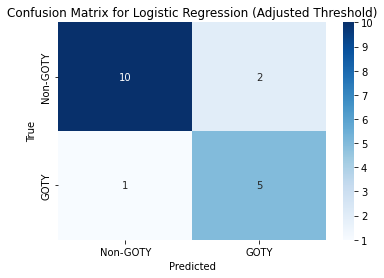

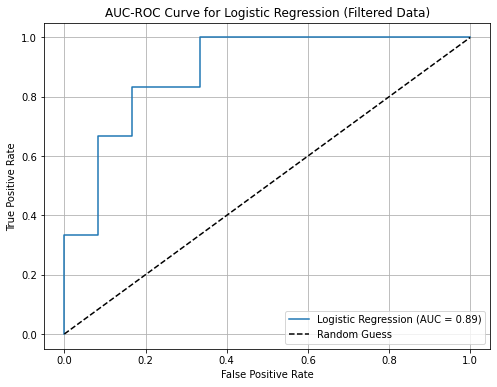

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the data
scaler = StandardScaler()
X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)
X_test_filtered_scaled = scaler.transform(X_test_filtered)

# Fit Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_filtered_scaled, y_train_filtered)

# Predictions
y_pred = log_reg.predict(X_test_filtered_scaled)
y_proba = log_reg.predict_proba(X_test_filtered_scaled)[:, 1]

# Threshold Adjustment for Better F1-Score
precision, recall, thresholds = precision_recall_curve(y_test_filtered, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid division by zero
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Results Before Threshold Adjustment
print("Classification Report for Logistic Regression (Filtered Data - Default Threshold):")
print(classification_report(y_test_filtered, y_pred))

# Results After Threshold Adjustment
print("Best Threshold for Logistic Regression:", best_threshold)
print("Classification Report for Logistic Regression (Adjusted Threshold):")
print(classification_report(y_test_filtered, y_pred_adjusted))

# Confusion Matrix for Adjusted Threshold
cm_adjusted = confusion_matrix(y_test_filtered, y_pred_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-GOTY", "GOTY"], yticklabels=["Non-GOTY", "GOTY"])
plt.title("Confusion Matrix for Logistic Regression (Adjusted Threshold)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test_filtered, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Logistic Regression (Filtered Data)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Classification Report for Decision Tree (Default Threshold):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.80      0.67      0.73         6

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18

Best Threshold for Decision Tree: 1.0
Classification Report for Decision Tree (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.80      0.67      0.73         6

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18



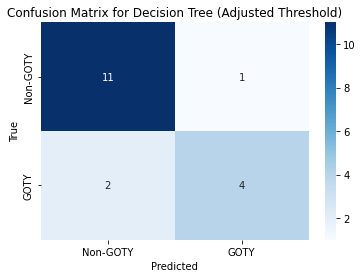

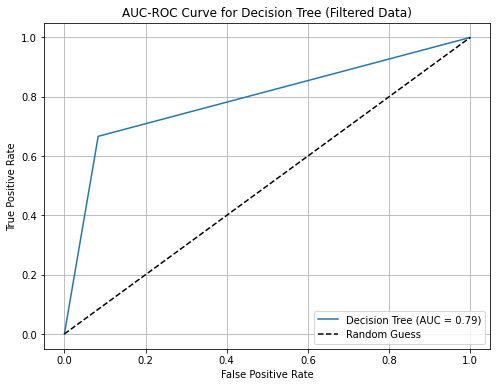

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters for Decision Tree
decision_tree_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
}

# GridSearchCV
decision_tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=decision_tree_params,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1,
)
decision_tree_grid.fit(X_train_filtered, y_train_filtered)

# Best Model
decision_tree_best = decision_tree_grid.best_estimator_

# Predictions
y_pred = decision_tree_best.predict(X_test_filtered)
y_proba = decision_tree_best.predict_proba(X_test_filtered)[:, 1]

# Threshold Adjustment for Better F1-Score
precision, recall, thresholds = precision_recall_curve(y_test_filtered, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid division by zero
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Results Before Threshold Adjustment
print("Best Parameters for Decision Tree:", decision_tree_grid.best_params_)
print("Classification Report for Decision Tree (Default Threshold):")
print(classification_report(y_test_filtered, y_pred))

# Results After Threshold Adjustment
print("Best Threshold for Decision Tree:", best_threshold)
print("Classification Report for Decision Tree (Adjusted Threshold):")
print(classification_report(y_test_filtered, y_pred_adjusted))

# Confusion Matrix for Adjusted Threshold
cm_adjusted = confusion_matrix(y_test_filtered, y_pred_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-GOTY", "GOTY"], yticklabels=["Non-GOTY", "GOTY"])
plt.title("Confusion Matrix for Decision Tree (Adjusted Threshold)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test_filtered, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Decision Tree (Filtered Data)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters for Random Forest: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report for Random Forest (Default Threshold):
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.33      0.50         6

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18

Best Threshold for Random Forest: 0.2654166666666667
Classification Report for Random Forest (Adjusted Threshold):
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.67      1.00      0.80         6

    accuracy                           0.83        18
   macro avg       0.83      0.88      0.83     

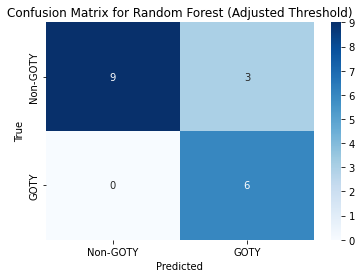

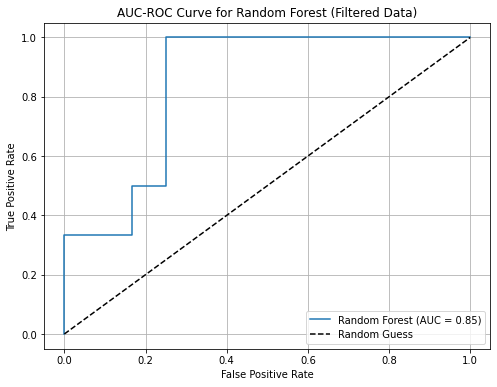

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters for Random Forest
random_forest_params = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "bootstrap": [True, False],
}

# GridSearchCV
random_forest_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=random_forest_params,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1,
)
random_forest_grid.fit(X_train_filtered, y_train_filtered)

# Best Model
random_forest_best = random_forest_grid.best_estimator_

# Predictions
y_pred = random_forest_best.predict(X_test_filtered)
y_proba = random_forest_best.predict_proba(X_test_filtered)[:, 1]

# Threshold Adjustment for Better F1-Score
precision, recall, thresholds = precision_recall_curve(y_test_filtered, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid division by zero
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Results Before Threshold Adjustment
print("Best Parameters for Random Forest:", random_forest_grid.best_params_)
print("Classification Report for Random Forest (Default Threshold):")
print(classification_report(y_test_filtered, y_pred))

# Results After Threshold Adjustment
print("Best Threshold for Random Forest:", best_threshold)
print("Classification Report for Random Forest (Adjusted Threshold):")
print(classification_report(y_test_filtered, y_pred_adjusted))

# Confusion Matrix for Adjusted Threshold
cm_adjusted = confusion_matrix(y_test_filtered, y_pred_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-GOTY", "GOTY"], yticklabels=["Non-GOTY", "GOTY"])
plt.title("Confusion Matrix for Random Forest (Adjusted Threshold)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test_filtered, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Random Forest (Filtered Data)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Classification Report for Gradient Boosting (Default Threshold):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.50      0.67         6

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

Best Threshold for Gradient Boosting: 0.34411896629000915
Classification Report for Gradient Boosting (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.80      0.67      0.73         6

    accuracy                           0.83        18
   macro avg       0.82      0.79    

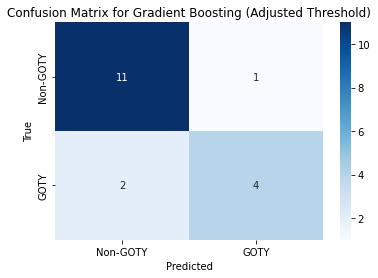

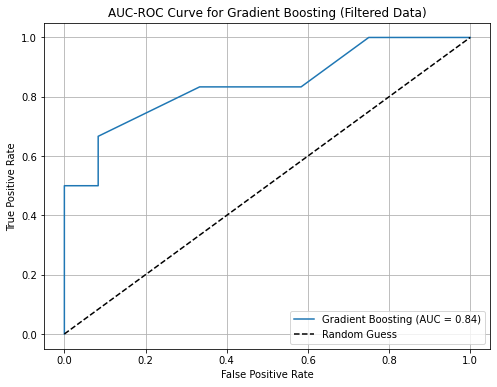

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters for Gradient Boosting
gbm_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "subsample": [0.8, 1.0],
}

# GridSearchCV
gbm_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=gbm_params,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1,
)
gbm_grid.fit(X_train_filtered, y_train_filtered)

# Best Model
gbm_best = gbm_grid.best_estimator_

# Predictions
y_pred = gbm_best.predict(X_test_filtered)
y_proba = gbm_best.predict_proba(X_test_filtered)[:, 1]

# Threshold Adjustment for Better F1-Score
precision, recall, thresholds = precision_recall_curve(y_test_filtered, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid division by zero
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Results Before Threshold Adjustment
print("Best Parameters for Gradient Boosting:", gbm_grid.best_params_)
print("Classification Report for Gradient Boosting (Default Threshold):")
print(classification_report(y_test_filtered, y_pred))

# Results After Threshold Adjustment
print("Best Threshold for Gradient Boosting:", best_threshold)
print("Classification Report for Gradient Boosting (Adjusted Threshold):")
print(classification_report(y_test_filtered, y_pred_adjusted))

# Confusion Matrix for Adjusted Threshold
cm_adjusted = confusion_matrix(y_test_filtered, y_pred_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-GOTY", "GOTY"], yticklabels=["Non-GOTY", "GOTY"])
plt.title("Confusion Matrix for Gradient Boosting (Adjusted Threshold)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test_filtered, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Gradient Boosting (Filtered Data)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


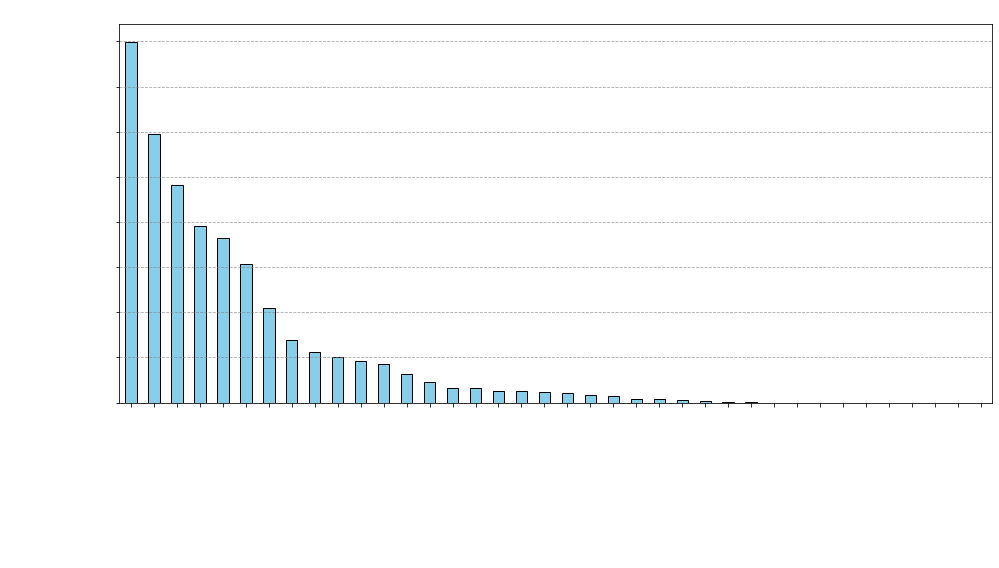

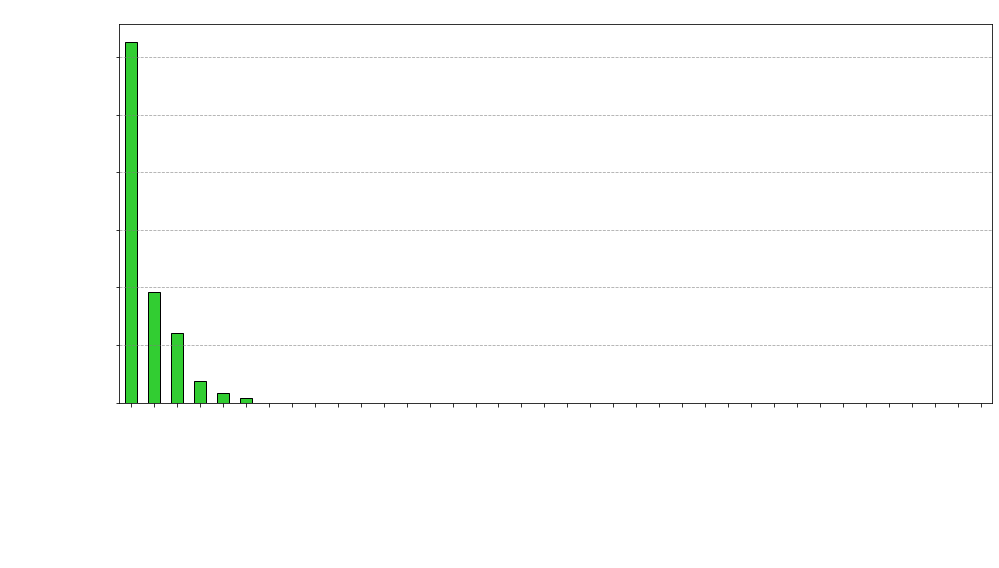

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Random Forest Feature Importance
plt.figure(figsize=(14, 8))
rf_feature_importance.sort_values(ascending=False).plot(
    kind='bar', 
    title="Random Forest Feature Importance", 
    color='skyblue', 
    edgecolor='black'
)
plt.ylabel("Importance Score", fontsize=14, color='white', fontweight='bold')
plt.xlabel("Features", fontsize=14, color='white', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.title("Random Forest Feature Importance", fontsize=16, color='white', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.tight_layout()
plt.show()

# Gradient Boosting Feature Importance
plt.figure(figsize=(14, 8))
gbm_feature_importance.sort_values(ascending=False).plot(
    kind='bar', 
    title="Gradient Boosting Feature Importance", 
    color='limegreen', 
    edgecolor='black'
)
plt.ylabel("Importance Score", fontsize=14, color='white', fontweight='bold')
plt.xlabel("Features", fontsize=14, color='white', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.title("Gradient Boosting Feature Importance", fontsize=16, color='white', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Initialize a results dictionary
results = {
    "Model": [],
    "Threshold": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": [],
    "F1 Score": [],
    "AUC-ROC": []
}

# Function to add results to the dictionary
def add_results(model_name, threshold, y_test, y_pred, y_proba):
    """
    Add model performance metrics to the results dictionary.

    Parameters:
    model_name (str): Name of the model.
    threshold (float): Applied decision threshold.
    y_test (array-like): True labels.
    y_pred (array-like): Predicted labels.
    y_proba (array-like): Predicted probabilities.
    """
    results["Model"].append(model_name)
    results["Threshold"].append(threshold)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["F1 Score"].append(f1_score(y_test, y_pred))
    results["AUC-ROC"].append(roc_auc_score(y_test, y_proba))

# Logistic Regression
add_results("Logistic Regression", best_threshold, y_test_filtered, y_pred_adjusted, y_proba)

# Decision Tree
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test_filtered, y_proba_tree)
f1_scores_tree = 2 * (precision_tree * recall_tree) / (precision_tree + recall_tree + 1e-6)
best_threshold_tree_index = f1_scores_tree.argmax()
best_threshold_tree = thresholds_tree[best_threshold_tree_index]
y_pred_tree_adjusted = (y_proba_tree >= best_threshold_tree).astype(int)
add_results("Decision Tree", best_threshold_tree, y_test_filtered, y_pred_tree_adjusted, y_proba_tree)

# Random Forest
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test_filtered, y_proba_rf)
f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf + 1e-6)
best_threshold_rf_index = f1_scores_rf.argmax()
best_threshold_rf = thresholds_rf[best_threshold_rf_index]
y_pred_rf_adjusted = (y_proba_rf >= best_threshold_rf).astype(int)
add_results("Random Forest", best_threshold_rf, y_test_filtered, y_pred_rf_adjusted, y_proba_rf)

# Gradient Boosting
precision_gbm, recall_gbm, thresholds_gbm = precision_recall_curve(y_test_filtered, y_proba_gbm)
f1_scores_gbm = 2 * (precision_gbm * recall_gbm) / (precision_gbm + recall_gbm + 1e-6)
best_threshold_gbm_index = f1_scores_gbm.argmax()
best_threshold_gbm = thresholds_gbm[best_threshold_gbm_index]
y_pred_gbm_adjusted = (y_proba_gbm >= best_threshold_gbm).astype(int)
add_results("Gradient Boosting", best_threshold_gbm, y_test_filtered, y_pred_gbm_adjusted, y_proba_gbm)

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


                 Model  Threshold  Accuracy    Recall  Precision  F1 Score  \
0  Logistic Regression   0.344119  0.833333  0.666667   0.800000  0.727273   
1        Decision Tree   1.000000  0.833333  0.666667   0.800000  0.727273   
2        Random Forest   0.265417  0.833333  1.000000   0.666667  0.800000   
3    Gradient Boosting   0.344119  0.833333  0.666667   0.800000  0.727273   

    AUC-ROC  
0  0.840278  
1  0.791667  
2  0.847222  
3  0.840278  
